# Project 1: EDA

The data that I chose for Project 1 is called Accidental Drug Related Deaths 2012–2022 (in Connecticut), which I chose due to the various information provided in the dataset, which would be a good dataset for EDA. 

I found this dataset through Data.gov. (Description: A listing of each accidental death associated with drug overdose in Connecticut from 2012 to 2022.)

This data is derived from an investigation by the Office of the Chief Medical Examiner, which includes the toxicity report, death certificate, and scene investigation. This is a non-federal public dataset. 

Linked: https://catalog.data.gov/dataset/accidental-drug-related-deaths-2012-2018

Size of data: 4.8 MB
Rows: 10655
Columns: 48

- Demographic Analysis: Age, Race, and Sex. To identify if some demographics are more prone to others
- Drug Analysis: Trends of drugs used or supplemental drugs used will determine which drugs are most common. 
- Trend analysis: To see if the time of the day, month, or year can affect the number of deaths happening due to accidental drug overdose
- Correlation: Which factors are correlated to one another such as between age and drug use or other demographic factors and death rates. 

### Importing Libraries and Data Set 

In [7]:
!pip install matplotlib
!pip install seaborn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [5]:
pd.set_option('display.max_columns', 200) #displays upto 200 columns 

In [6]:
df = pd.read_csv('Accidental_Drug_Related_Deaths_2012-2022.csv')

### Understanding the Data Set

- Dataframe `shape`: shows the number of rows and columns of the data 
- `head` and `tail`: shows top and bottom rows of the set 
- `dtypes`: shows all the types of columns
- `describe`: gives us summary statistics for numerical columns in our DataFrame.

In [7]:
df.head()

,Date,Date Type,Age,Sex,Race,Ethnicity,Residence City,Residence County,Residence State,Injury City,Injury County,Injury State,Injury Place,Description of Injury,Death City,Death County,Death State,Location,Location if Other,Cause of Death,Manner of Death,Other Significant Conditions,Heroin,Heroin death certificate (DC),Cocaine,Fentanyl,Fentanyl Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Meth/Amphetamine,Amphet,Tramad,Hydromorphone,Morphine (Not Heroin),Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Other Opioid,Any Opioid,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo
0,5/29/12,Date of death,37.0,Male,Black,NaN,STAMFORD,FAIRFIELD,NaN,STAMFORD,NaN,CT,Residence,Used Cocaine,NaN,NaN,NaN,Residence,NaN,Cocaine Toxicity,Accident,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"STAMFORD, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)","CT\n(41.575155, -72.738288)"
1,6/27/12,Date of death,37.0,Male,White,NaN,NORWICH,NEW LONDON,NaN,NORWICH,NaN,CT,Residence,Drug Use,NORWICH,NEW LONDON,NaN,Hospital,NaN,Heroin Toxicity,Accident,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NORWICH, CT\n(41.524304, -72.075821)","NORWICH, CT\n(41.524304, -72.075821)","Norwich, CT\n(41.524304, -72.075821)"
2,3/24/14,Date of death,28.0,Male,White,NaN,HEBRON,NaN,NaN,HEBRON,NaN,CT,Residence,Drug Use,MARLBOROUGH,NaN,NaN,Hospital,NaN,Heroin Intoxication,Accident,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"HEBRON, CT\n(41.658069, -72.366324)","HEBRON, CT\n(41.658069, -72.366324)","Marlborough, CT\n(41.632043, -72.461309)"
3,12/31/14,Date of death,26.0,Female,White,NaN,BALTIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BALTIC,NEW LONDON,NaN,Residence,NaN,Acute Heroin Intoxication,Accident,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BALTIC, CT\n(41.617221, -72.085031)","CT\n(41.575155, -72.738288)","Baltic, CT\n(41.617221, -72.085031)"
4,1/16/16,Date of death,41.0,Male,White,NaN,SHELTON,FAIRFIELD,CT,SHELTON,NaN,NaN,Residence,Drug Use,BRIDGEPORT,NaN,NaN,Hospital,NaN,Acute Fentanyl Intoxication,Accident,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,"SHELTON, CT\n(41.316843, -73.092968)","SHELTON, CT\n(41.316843, -73.092968)","Bridgeport, CT\n(41.179195, -73.189476)"


In [12]:
df.describe()

,Age
count,10652.000000
mean,43.515302
std,12.601832
min,13.000000
25%,33.000000
50%,43.000000
75%,54.000000
max,87.000000


In [13]:
df.shape #rows and columns

(10654, 48)

In [14]:
df.columns 

Index(['Date', 'Date Type', 'Age', 'Sex', 'Race', 'Ethnicity',
       'Residence City', 'Residence County', 'Residence State', 'Injury City',
       'Injury County', 'Injury State', 'Injury Place',
       'Description of Injury', 'Death City', 'Death County', 'Death State',
       'Location', 'Location if Other', 'Cause of Death', 'Manner of Death',
       'Other Significant Conditions ', 'Heroin',
       'Heroin death certificate (DC)', 'Cocaine', 'Fentanyl',
       'Fentanyl Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
       'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine',
       'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
       'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine',
       'Other Opioid', 'Any Opioid', 'Other', 'ResidenceCityGeo',
       'InjuryCityGeo', 'DeathCityGeo'],
      dtype='object')

In [15]:
df.dtypes #type of columns 

Date                              object
Date Type                         object
Age                              float64
Sex                               object
Race                              object
Ethnicity                         object
Residence City                    object
Residence County                  object
Residence State                   object
Injury City                       object
Injury County                     object
Injury State                      object
Injury Place                      object
Description of Injury             object
Death City                        object
Death County                      object
Death State                       object
Location                          object
Location if Other                 object
Cause of Death                    object
Manner of Death                   object
Other Significant Conditions      object
Heroin                            object
Heroin death certificate (DC)     object
Cocaine         

### Preparing the Data 
- Dropping missing irrelevant rows/columns
- Identifying if duplicate columns are present
- Renaming columns

In [8]:
df = df[['Date', 'Date Type', 'Age', 'Sex', 'Race', 'Ethnicity',
                       'Residence City', 'Residence County', 'Residence State', 'Injury City',
                       'Injury County', 'Injury State', 'Injury Place',
                       'Description of Injury', 'Death City', 'Death County', 'Death State',
                       'Location', 'Location if Other', 'Cause of Death', #'Manner of Death',
                       'Other Significant Conditions ', 'Heroin',
                       #'Heroin death certificate (DC)', 
                       'Cocaine', 'Fentanyl',
                       'Fentanyl Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
                       'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine',
                       'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
                       'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine',
                       'Other Opioid', 'Any Opioid', 'Other', #'ResidenceCityGeo',
                       #'InjuryCityGeo', 'DeathCityGeo'
                      ]].copy()
#choosing relevant columns from the dataset data and making a copy of the dataset

In [9]:
df

,Date,Date Type,Age,Sex,Race,Ethnicity,Residence City,Residence County,Residence State,Injury City,Injury County,Injury State,Injury Place,Description of Injury,Death City,Death County,Death State,Location,Location if Other,Cause of Death,Other Significant Conditions,Heroin,Cocaine,Fentanyl,Fentanyl Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Meth/Amphetamine,Amphet,Tramad,Hydromorphone,Morphine (Not Heroin),Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Other Opioid,Any Opioid,Other
0,5/29/12,Date of death,37.0,Male,Black,NaN,STAMFORD,FAIRFIELD,NaN,STAMFORD,NaN,CT,Residence,Used Cocaine,NaN,NaN,NaN,Residence,NaN,Cocaine Toxicity,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6/27/12,Date of death,37.0,Male,White,NaN,NORWICH,NEW LONDON,NaN,NORWICH,NaN,CT,Residence,Drug Use,NORWICH,NEW LONDON,NaN,Hospital,NaN,Heroin Toxicity,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/24/14,Date of death,28.0,Male,White,NaN,HEBRON,NaN,NaN,HEBRON,NaN,CT,Residence,Drug Use,MARLBOROUGH,NaN,NaN,Hospital,NaN,Heroin Intoxication,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12/31/14,Date of death,26.0,Female,White,NaN,BALTIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BALTIC,NEW LONDON,NaN,Residence,NaN,Acute Heroin Intoxication,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/16/16,Date of death,41.0,Male,White,NaN,SHELTON,FAIRFIELD,CT,SHELTON,NaN,NaN,Residence,Drug Use,BRIDGEPORT,NaN,NaN,Hospital,NaN,Acute Fentanyl Intoxication,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10649,8/15/22,Date of death,60.0,Male,White,NaN,SOUTHINGTON,HARTFORD,CT,SOUTHINGTON,HARTFORD,CT,Unspecified Place,Took drug,NaN,NaN,NaN,Other (Specify),Parked vehicle,Acute Methadone Intoxication,Hypertensive and Atherosclerotic Cardiovascula...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN
10650,1/30/22,Date of death,65.0,Male,White,NaN,HARTFORD,HARTFORD,CT,HARTFORD,HARTFORD,CT,Home,Substance Abuse,NaN,NaN,NaN,Decedent’s Home,NaN,"Acute Intoxication Due To Fentanyl, Morphine, ...",NaN,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,y,Buprenorphine,Y,Buprenorphine
10651,9/17/22,Date of death,41.0,Male,Black or African American,NaN,HARTFORD,HARTFORD,CT,HARTFORD,HARTFORD,CT,NaN,Substance Use,NaN,NaN,NaN,Decedent’s Home,NaN,Acute Intoxication due to the Combined Effects...,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Y,NaN
10652,12/20/22,Date of death,59.0,Male,White,NaN,CHESHIRE,NEW HAVEN,CT,CHESHIRE,NEW HAVEN,CT,Home,Drug Use,NaN,NaN,NaN,Decedent’s Home,NaN,Acute Intoxication due to the Combined Effects...,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Y,NaN


In [10]:
df['date'] = pd.to_datetime(df['Date'])
df['date'] #formatting the date so that it is easy to understand and implement in the EDA in the future

/var/folders/b1/cm4yxg255jd244j8f00d_sbc0000gn/T/ipykernel_40810/2793046144.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['Date'])


0       2012-05-29
1       2012-06-27
2       2014-03-24
3       2014-12-31
4       2016-01-16
           ...    
10649   2022-08-15
10650   2022-01-30
10651   2022-09-17
10652   2022-12-20
10653   2022-09-08
Name: date, Length: 10654, dtype: datetime64[ns]

## Demographic Analysis
Using Age, Race, and Sex identify if some demographics are more prone to accidental drug overdose than others

In [19]:
#Figuring out the null values in the following columns
print(df[['Age', 'Race', 'Sex']].isnull().sum())

Age      2
Race    29
Sex      9
dtype: int64


Matplotlib commands: 
- `plt.figure` -> 10= width and 6= height
- `plt.title` -> title of the graph
- `plt.xlabel` `plt.ylabel` -> x and y axis
- `plt.get_ylim` -> Get the y-axis range
- `xticks` & `yticks` -> specify the locations and labels of the tick marks on the x-axis and y-axis of a plot
- `plt.tight_layout`

Seaborn: 
- `.dropna`: drop the null values
- `bins`: number of intervals
- `kde`: adds a KDE plot
- `color`: the color of the chart

Citations: 
- https://seaborn.pydata.org/generated/seaborn.histplot.html
- https://matplotlib.org/stable/index.html


### Plotting distribution of age 
How age and number of drug relating accidents are correlated. 

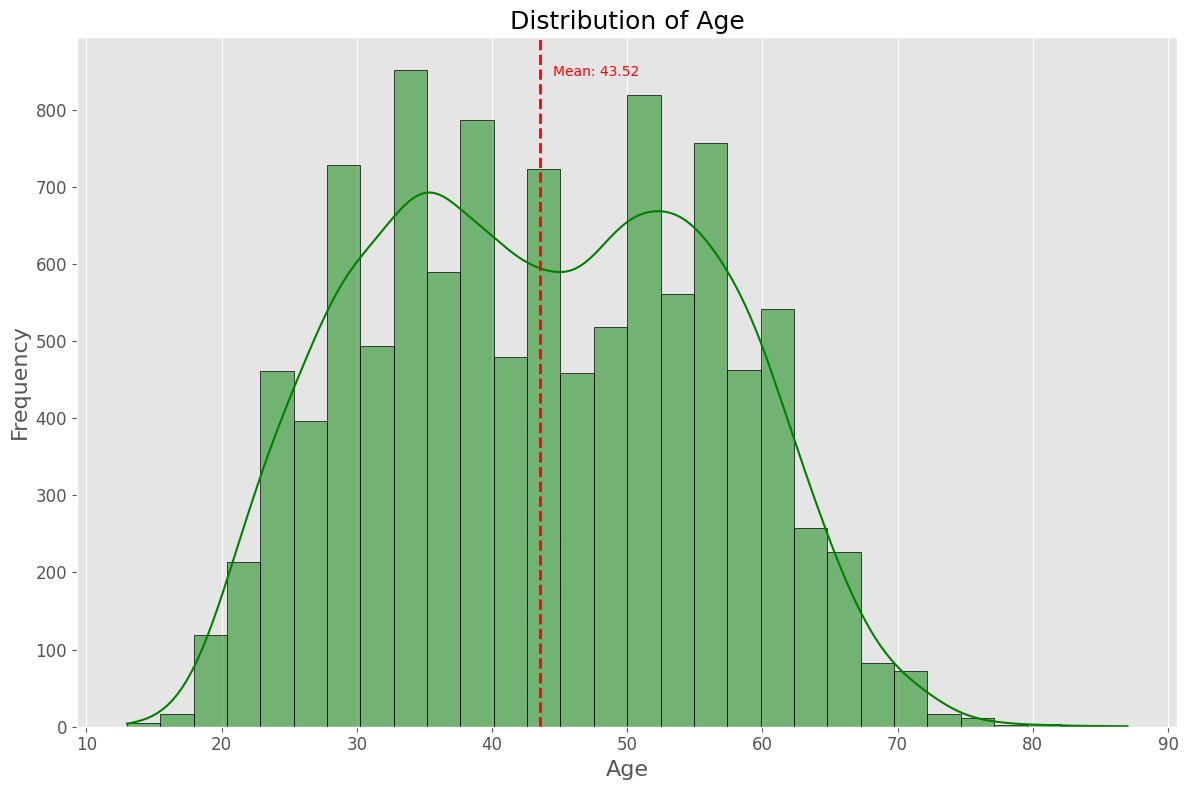

In [20]:
plt.figure(figsize=(12, 8)) 
sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='green', edgecolor='black')

# Calculating the mean age and to add a vertical line to the plot
mean_age = df['Age'].mean()
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2)

# Making the mean line easy to understand
plt.text(mean_age+1, plt.gca().get_ylim()[1]-50, f'Mean: {mean_age:.2f}', color='red')

plt.title('Distribution of Age', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')  # Adding gridlines

plt.tight_layout() # Making sure everything fits
plt.show()

Citations: https://stackoverflow.com/questions/43170049/plotting-mean-as-dashed-line-on-histogram-with-matplotlib

### Plotting distribution of Race
How Race and number of drug relating accidents are correlated. 

/var/folders/b1/cm4yxg255jd244j8f00d_sbc0000gn/T/ipykernel_38492/205740211.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y= 'Race', data= df, palette= 'pastel', order = df['Race'].value_counts().index)


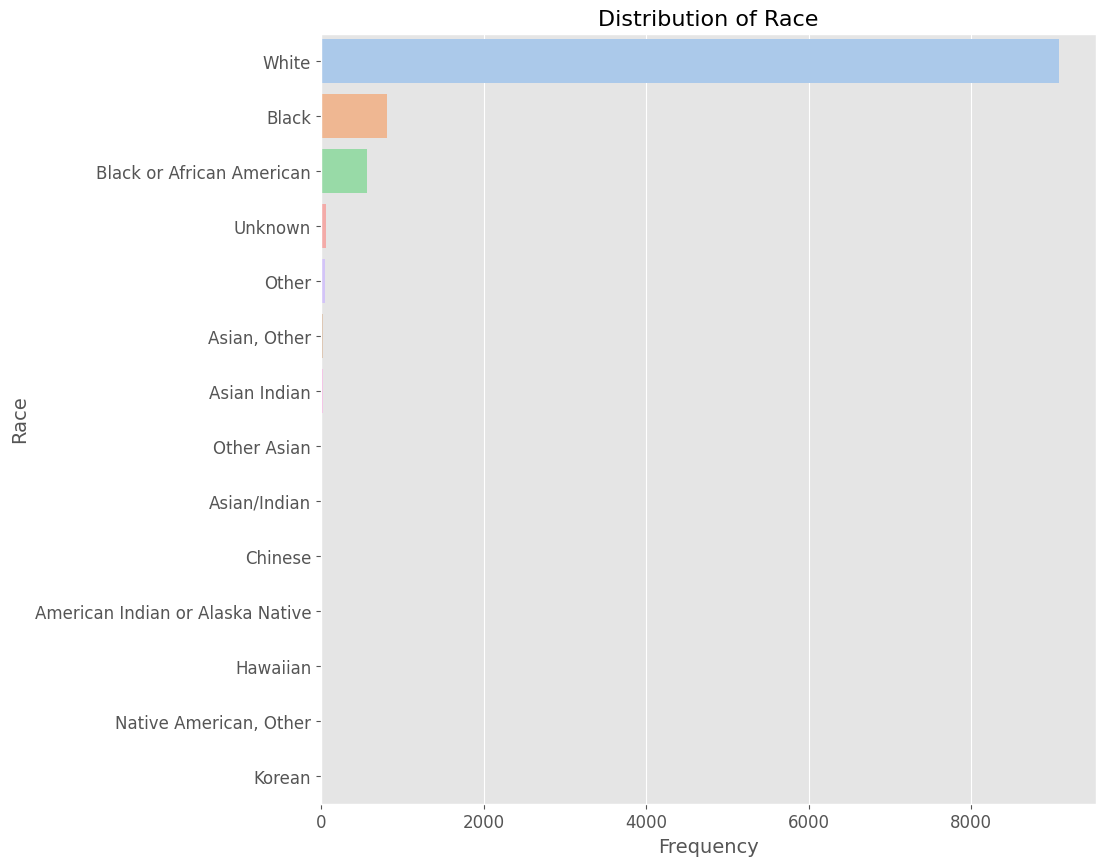

Race
White                               9078
Black                                809
Black or African American            561
Unknown                               59
Other                                 50
Asian, Other                          24
Asian Indian                          21
Other Asian                           12
Asian/Indian                           5
Chinese                                2
American Indian or Alaska Native       1
Hawaiian                               1
Native American, Other                 1
Korean                                 1
Name: count, dtype: int64


In [21]:
plt.figure(figsize=(10, 10)) 
sns.countplot(y= 'Race', data= df, palette= 'pastel', order = df['Race'].value_counts().index)
plt.title('Distribution of Race', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Race', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
print(df['Race'].value_counts()) # Shows the actual number of distribution with respect to the race. 

### Plotting distribution of Sex
How Sex/Gender and drug relating accidents are correlated. 

/var/folders/b1/cm4yxg255jd244j8f00d_sbc0000gn/T/ipykernel_38492/2917175052.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='muted', legend=False)


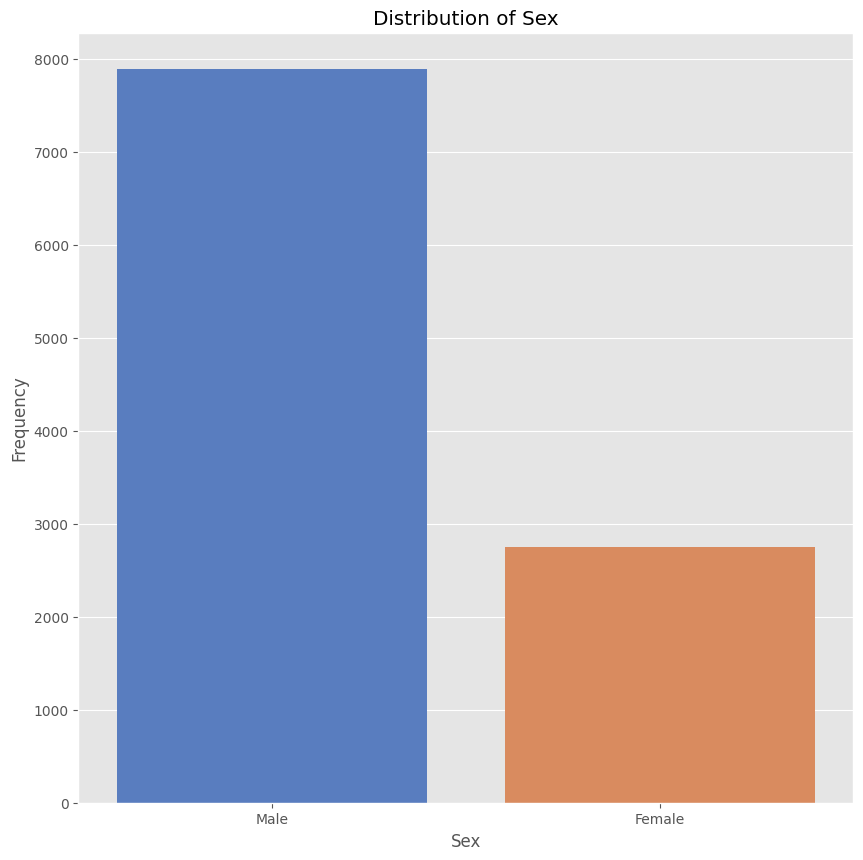

Sex
Male      7890
Female    2755
Name: count, dtype: int64


In [22]:
plt.figure(figsize=(10,10)) 
sns.countplot(x='Sex', data=df, palette='muted', legend=False)
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

print(df['Sex'].value_counts())

## Drug Analysis 
Trends of drugs used or supplemental drugs used will determine which drugs are most common. 

In [23]:
 drug_columns = df[['Heroin',
       'Cocaine', 'Fentanyl',
       'Fentanyl Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
       'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine',
       'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)',
       'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine',
       'Other Opioid', 'Any Opioid', 'Other']].copy()
#choosing relevant drug data for drug analysis

In [24]:
drug_presence_counts = {drug: df[drug].notnull().sum() for drug in drug_columns} #Counts how many non null values are in the drug columns to report the presence of drugs
drug_presence_counts

{'Heroin': 3472,
 'Cocaine': 3855,
 'Fentanyl': 6925,
 'Fentanyl Analogue': 804,
 'Oxycodone': 950,
 'Oxymorphone': 157,
 'Ethanol': 2878,
 'Hydrocodone': 163,
 'Benzodiazepine': 2499,
 'Methadone': 938,
 'Meth/Amphetamine': 127,
 'Amphet': 359,
 'Tramad': 284,
 'Hydromorphone': 67,
 'Morphine (Not Heroin)': 55,
 'Xylazine': 792,
 'Gabapentin': 348,
 'Opiate NOS': 126,
 'Heroin/Morph/Codeine': 2090,
 'Other Opioid': 128,
 'Any Opioid': 7620,
 'Other': 692}

In [25]:
sorted_drugs = sorted(drug_presence_counts.items(), key=lambda item: item[1], reverse=True) #The tuple will have two values: drugs and counts for the bar chart

In [26]:
drug, counts = zip(*sorted_drugs)

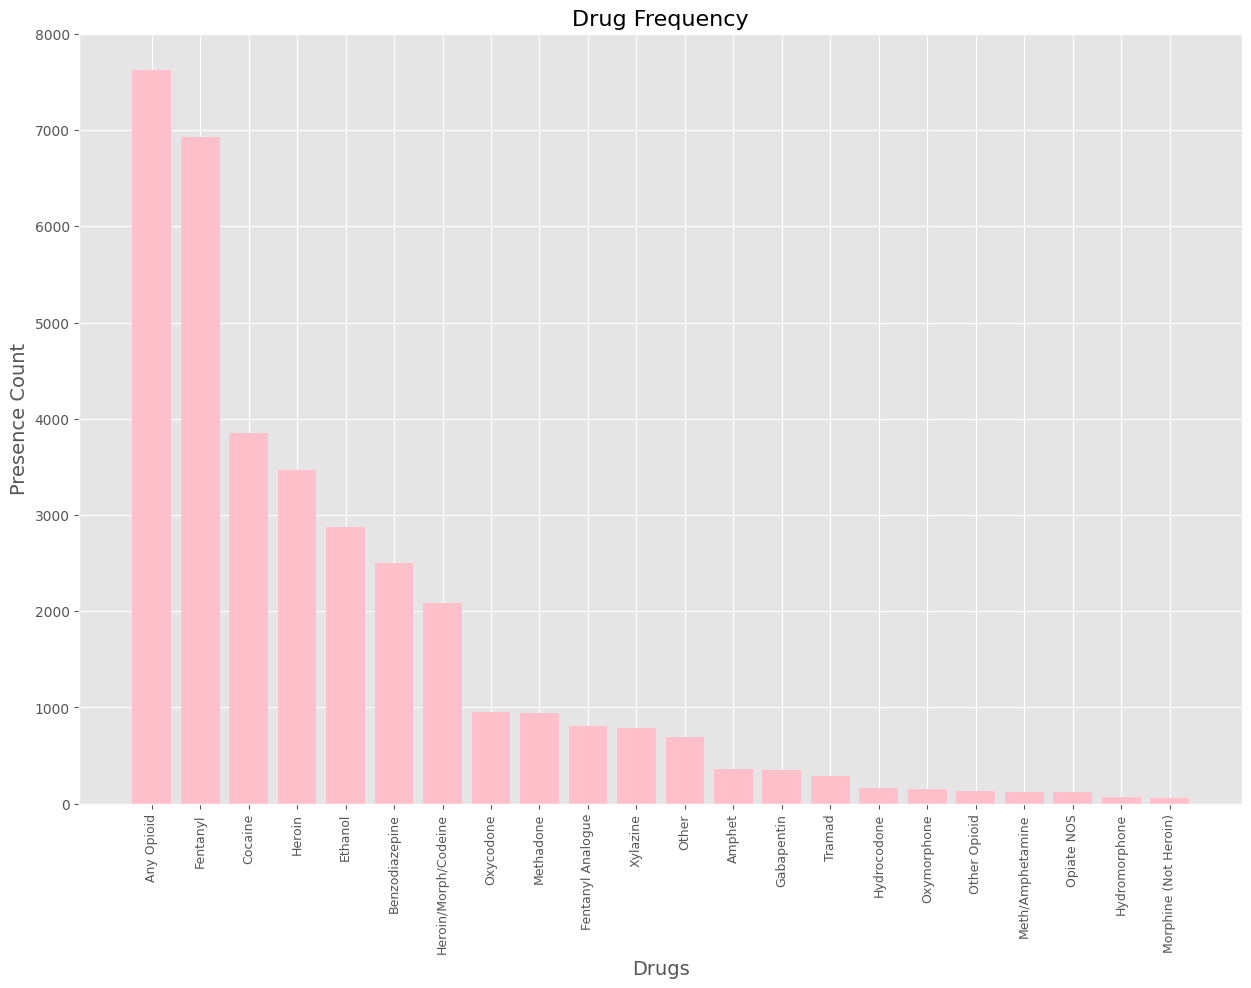

In [27]:
plt.figure(figsize=(15,10))
plt.bar(drug, counts, color = 'Pink')
plt.xlabel('Drugs', fontsize=14)
plt.ylabel('Presence Count', fontsize=14)
plt.xticks(rotation=90, fontsize=9)
plt.title('Drug Frequency', fontsize=16)
plt.show()

## Trend Analysis
Looking at the trends of how the drug related trends correlate with time (increasing or decreasing)

/var/folders/b1/cm4yxg255jd244j8f00d_sbc0000gn/T/ipykernel_38492/3328382527.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Year'] = pd.to_datetime(df['Date'], errors='coerce').dt.year


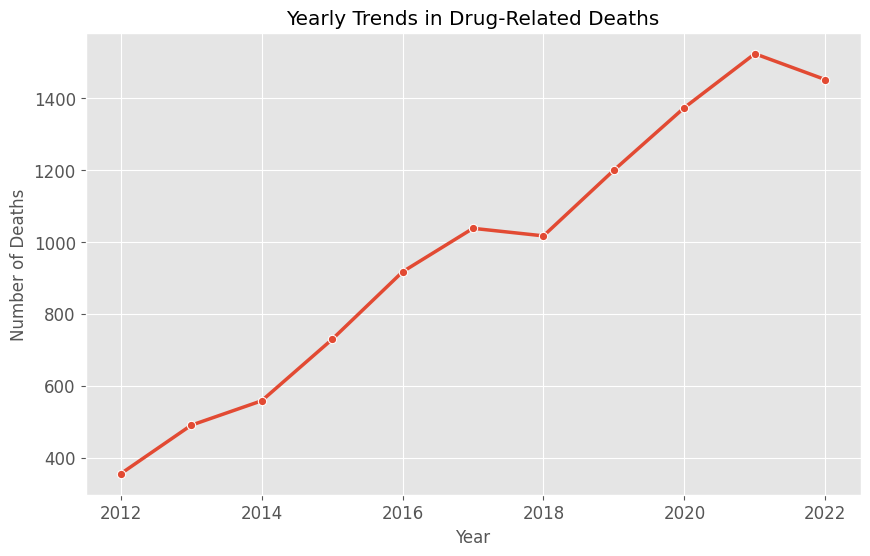

In [28]:
df['Year'] = pd.to_datetime(df['Date'], errors='coerce').dt.year
yearly_deaths = df['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_deaths.index, y=yearly_deaths.values, linewidth=2.5, marker='o') #Making sure the line of the width is higher and the marking each year with a circle
plt.title('Yearly Trends in Drug-Related Deaths')
plt.xlabel('Year')
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12) 
plt.ylabel('Number of Deaths')
plt.grid(True) #Showing a grid across the graph
plt.show()

## Correlation Analysis
Showing correlation of the preferred drug and the Race

In [29]:
drug_columns = ['Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine', 'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)', 'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine', 'Other Opioid', 'Any Opioid', 'Other']
race_column = 'Race'

In [30]:
for drug in drug_columns: 
    df[drug] = df[drug].notnull().astype(int) #Making sure the values in the drug columns are not null and classifying them into true and false boolean values

In [31]:
race_drug_frequency = df.groupby(race_column)[drug_columns].sum()

- `melt` is used transform a DataFrame from a wide format to a long format
- `var_name` gives name to the new column
- `value_name` gives a name to the new column in the melted DataFrame that will contain the values from the original DataFrame 


In [34]:
race_drug_frequency.reset_index(inplace=True)
melted_data = race_drug_frequency.melt(id_vars=race_column, var_name='Drug', value_name='Frequency')

Citations: https://pandas.pydata.org/docs/reference/api/pandas.melt.html

/var/folders/b1/cm4yxg255jd244j8f00d_sbc0000gn/T/ipykernel_38492/2030727049.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels to prevent overlap


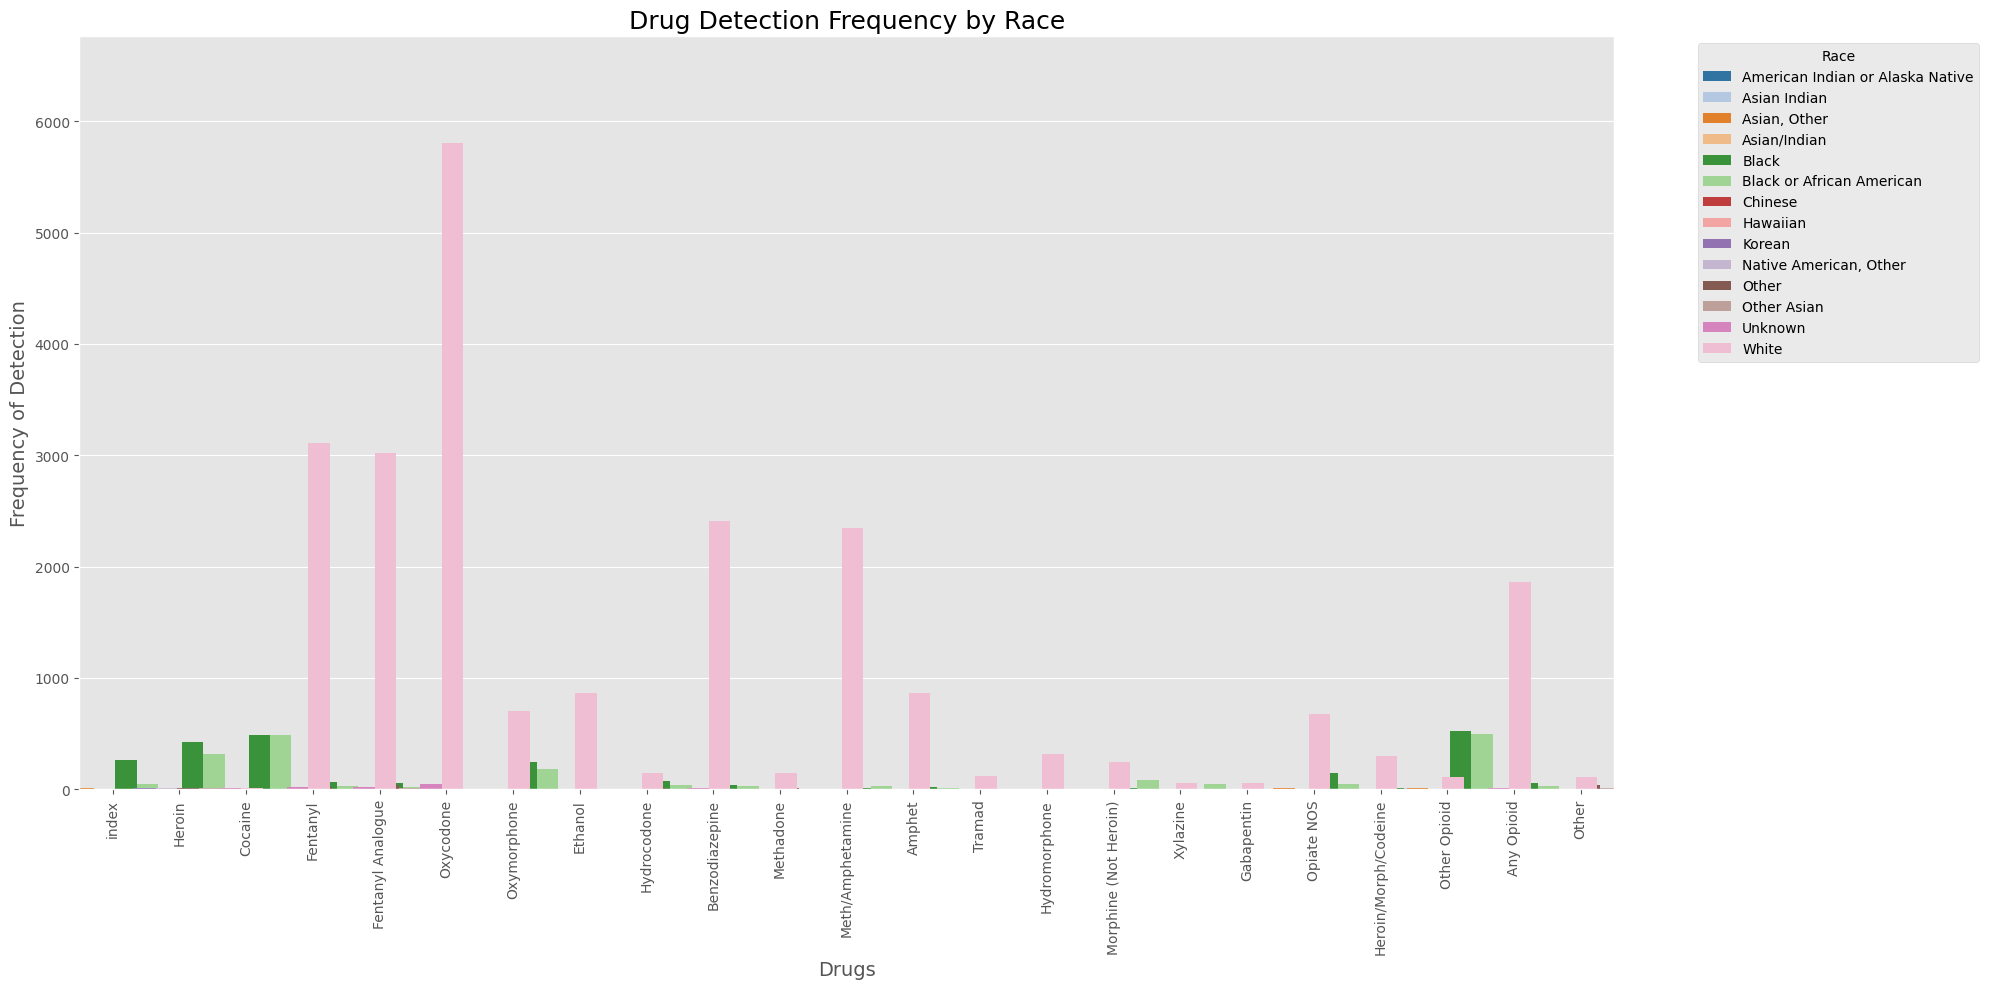

In [38]:
plt.figure(figsize=(20, 10))  # Increase figure size
ax = sns.barplot(
    x='Drug', 
    y='Frequency', 
    hue='Race', 
    data=melted_data, 
    palette='tab20',
    width= 4.5 #the width of each bar on the chart
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels to prevent overlap
ax.set_title('Drug Detection Frequency by Race', fontsize=18)
ax.set_xlabel('Drugs', fontsize=14)
ax.set_ylabel('Frequency of Detection', fontsize=14)
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot, and showing the graph in a box
plt.tight_layout()
plt.show()

### References:
- https://seaborn.pydata.org/generated/seaborn.histplot.html
- https://matplotlib.org/stable/index.html
- https://stackoverflow.com/questions/43170049/plotting-mean-as-dashed-line-on-histogram-with-matplotlib
- https://pandas.pydata.org/docs/reference/api/pandas.melt.html
- https://youtu.be/xi0vhXFPegw?si=NOQgdNxC6WK9Hh18
- https://matplotlib.org/1.3.0/api/axes_api.html#matplotlib.axes.Axes.get_ylim